---

<h1 style="color:#012eba">Introduction to Image Processing with Python</h1>
<h1 style="color:#012eba">Episode 2: Image Enhancements, Part 1: Fourier Transform</h1>

---

*DASCI 261 - Introduction to Image Processing*

*Prepared by Erika G. Lacson*

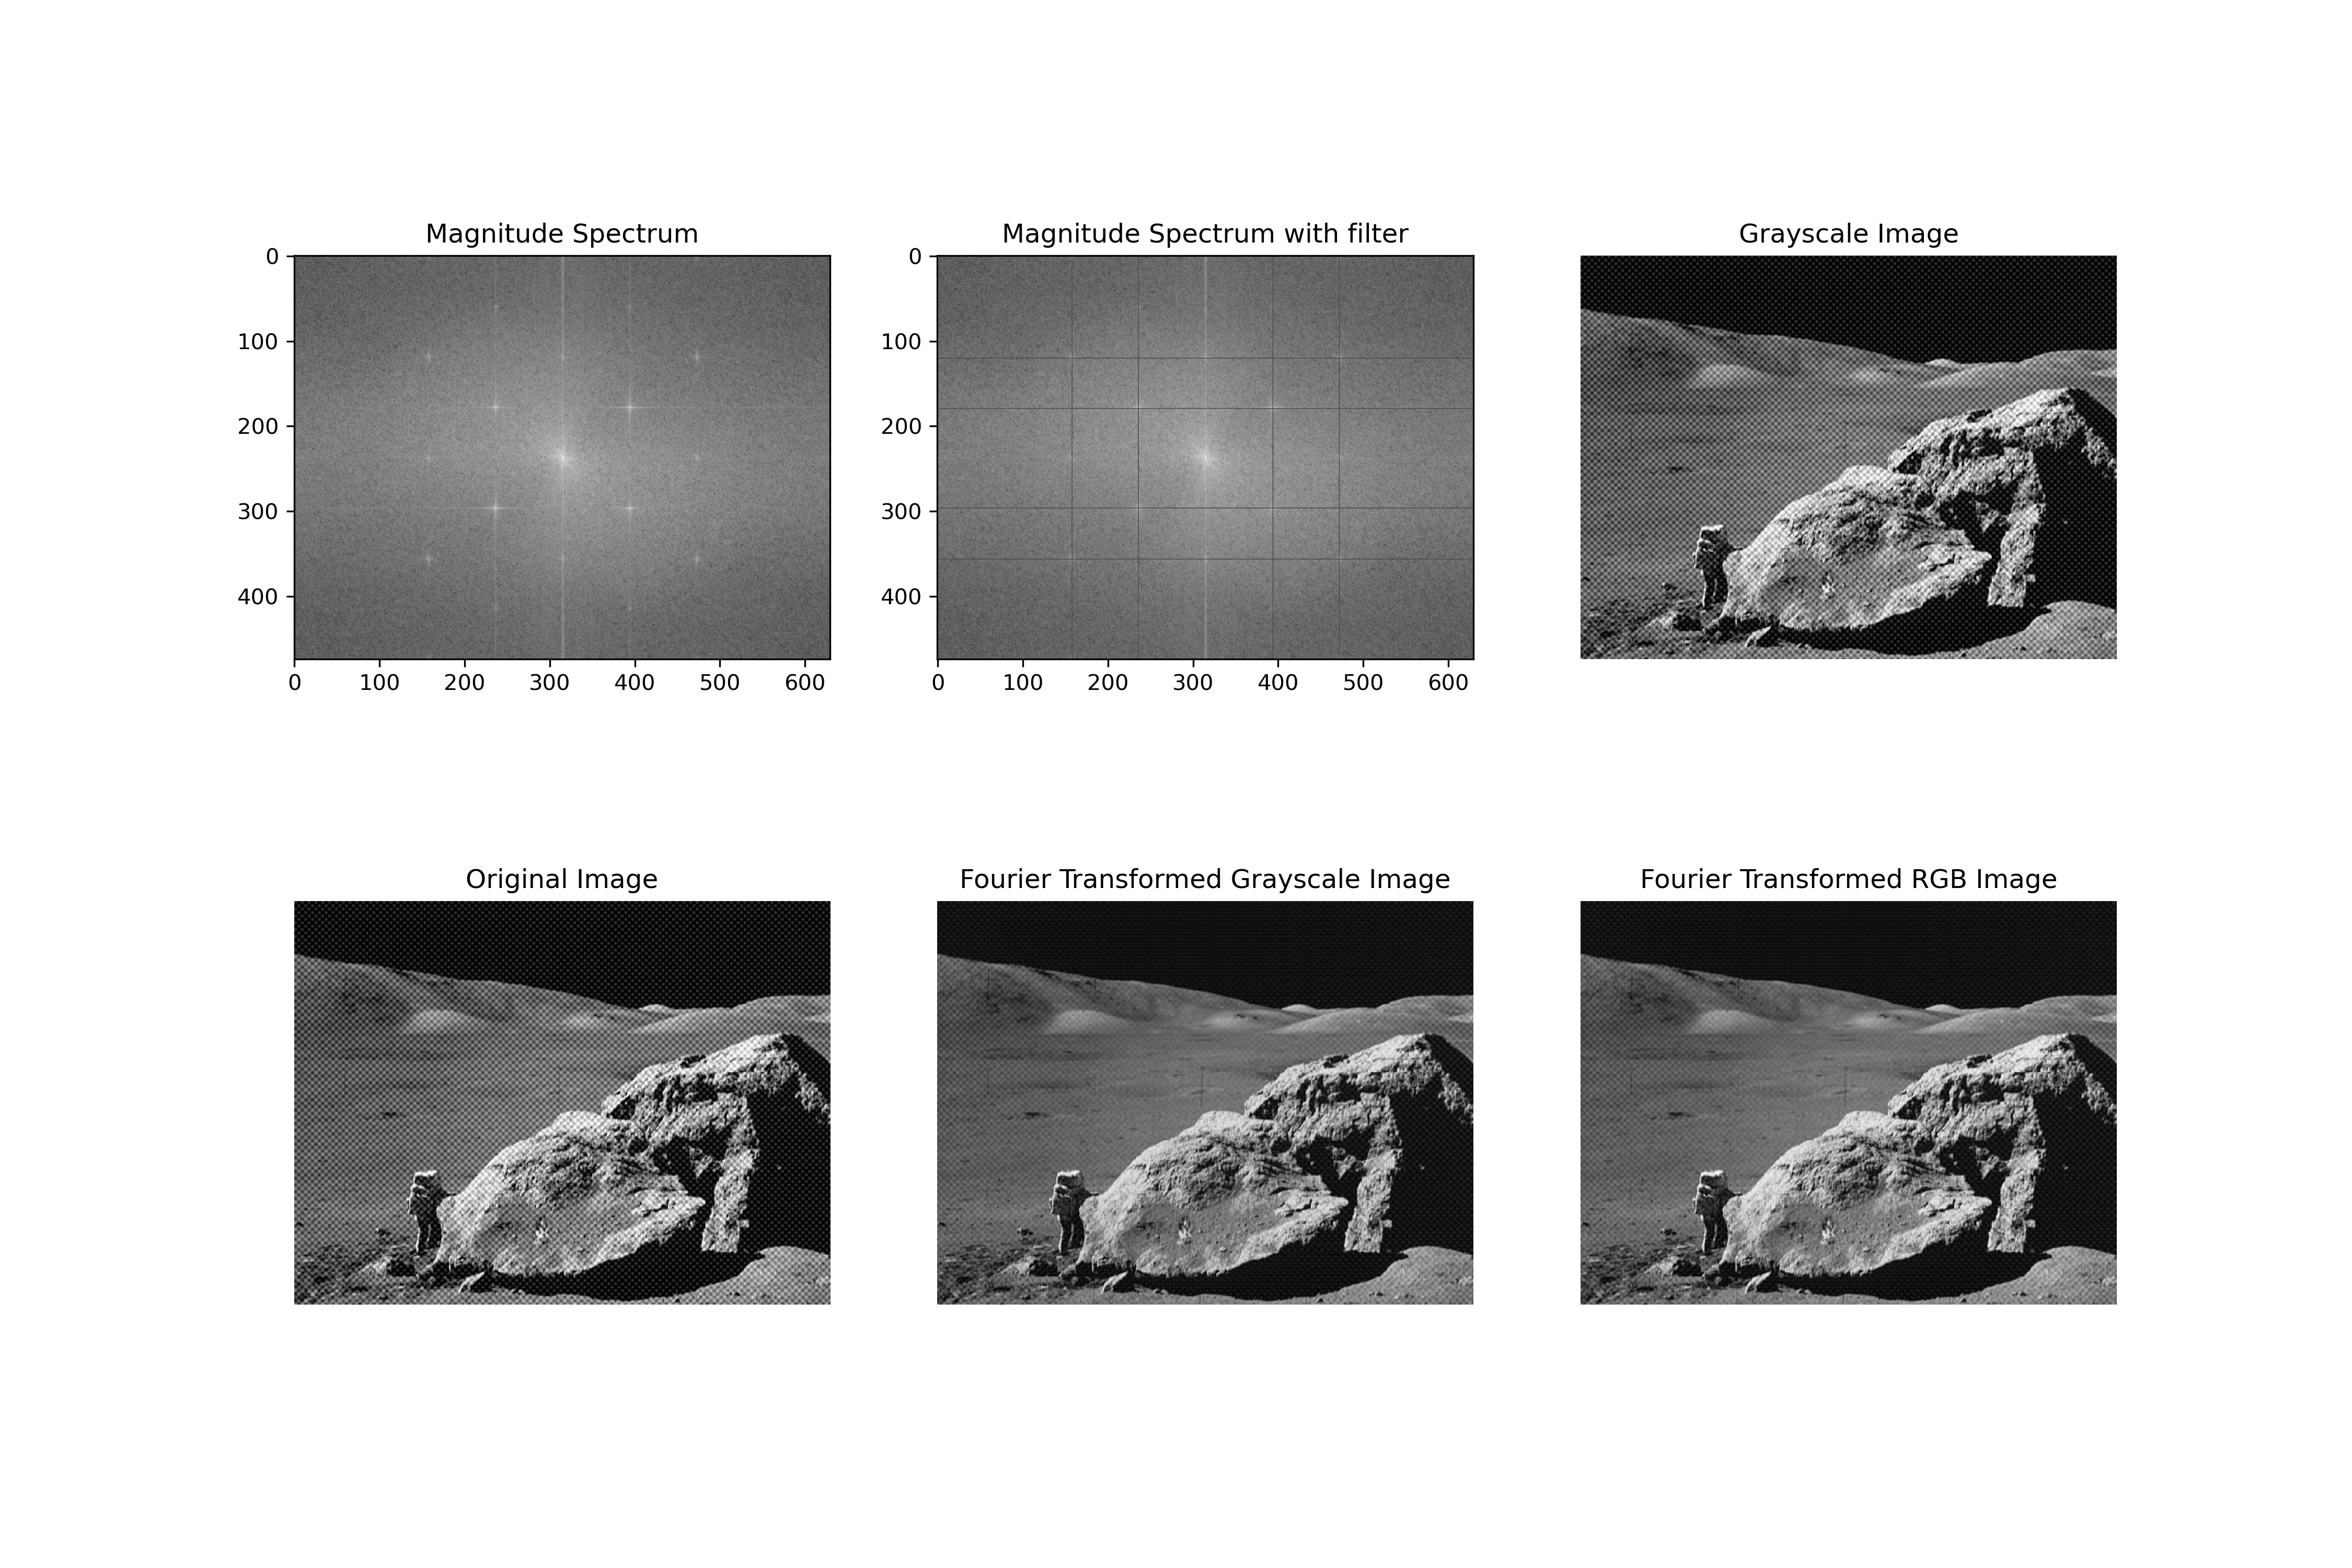

(source: NASA, edited by the author)

---
<h2 style="color:#ff0090">Introduction</h2>


Welcome back to my Introduction to Image Processing with Python series! In the previous episode, I explored the fundamentals of image processing, color spaces, and basic manipulations. In this second installment, we’ll dive deeper into the world of image enhancements. This will be a three-part episode covering Fourier Transform (Part 1), White Balancing (Part 2), and Histogram Manipulation (Part 3) techniques. As before, I’ll provide relevant Python codes using the skimage library, along with detailed explanations, to guide you through these techniques.

---
<h2 style="color:#ff0090">Review</h2>

*An image can be represented in two domains: the spatial domain and the frequency domain. The spatial domain is the most common representation of an image, with pixel values representing brightness or color at each point in the image. The frequency domain, on the other hand, represents the image as a collection of sinusoidal waves of varying frequencies and amplitudes.*

---

---
<h2 style="color:#ff0090">Part 1: Fourier Transform</h2>

Do you ever feel frustrated when your photos come out grainy and noisy in low-light conditions? 😩 If so, you’re not alone 🫂. Many people, photographers or not, face this issue, especially in challenging lighting situations. Luckily, <b>Fourier Transform</b>, a mathematical technique used in image processing, can help solve this problem by analyzing an image’s frequency components and revealing hidden patterns and structures. By using Fourier Transform, we can remove noise and enhance important features, making our photos look clear and crisp.

<b>Fourier Transform</b> is a powerful tool used in image processing to analyze an image’s frequency components. Essentially, it helps us identify intricate patterns and structures in the image’s frequency domain that are difficult to see in the spatial domain. Think of it as putting on glasses that allow you to see things in greater detail and clarity.

One common application of the Fourier Transform is noise removal from images. Noise typically appears in the high-frequency components of an image, which can be easily identified and isolated through Fourier Transform. By analyzing the frequency components of an image, we can remove noise or unwanted features and enhance important features. To achieve this, we *convert the image from the spatial domain to the frequency domain* using <b>Fourier Transform</b>, filter out the noise, and then use the <b>Inverse Fourier Transform</b> to convert the image back to the spatial domain.

If you want to learn more about Fourier Transform in the context of image processing, check out this webpage from the University of Edinburgh’s School of Informatics: https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm. It provides a comprehensive mathematical overview of Fourier Transform as well as some visualizations on how it works.

---

Now that we understand the potential of using Fourier Transform in image processing, let’s dive into a step-by-step process of how it can be used to improve the quality of an image and correct any distortions or noise.

#### Step 1: Import the necessary libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread, imshow

#### Step 2: Load and display the image

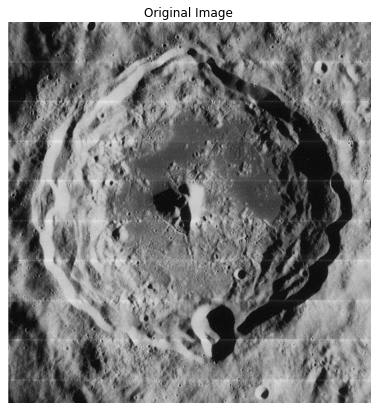

In [9]:
image = imread('lunar_orbiter.jpg')
plt.figure(figsize=(7,7))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

We can apply Fourier Transform in this image to remove the scan marks and improve its quality.

#### Step 3: Convert the image to grayscale and compute the 2D Fourier Transform

Converting the image to grayscale simplifies the analysis and reduces computational complexity. The 2D Fourier Transform is computed to obtain the frequency domain representation of the image.

In [10]:
# Convert the image to grayscale
gray_image = rgb2gray(image)

# Perform the Fast Fourier Transform on the grayscale image
f_image = np.fft.fft2(gray_image)

#### Step 4: Shift the DC or zero-frequency components to the center and compute the magnitude spectrum

An image's <b>frequency components</b> provide insight into the spatial patterns and repetitive structures within the image:

- <b>Low-frequency components</b> correspond to smooth and gradual changes, while
- <b>high-frequency components</b> represent abrupt changes and fine details.
- <b>The DC component, or zero frequency</b>, represents the average brightness of the image.

By understanding the importance of frequency components, we can use FT effectively in image processing to manipulate images and uncover hidden information.

After calculating the Fourier Transform, we need to shift the zero-frequency components (i.e., the DC component) to the center of the spectrum to better visualize the low and high frequencies.

We can use the `np.fft.fftshift()` function for this purpose:

In [11]:
fshift = np.fft.fftshift(f_image)

#### Step 5: Visualize the magnitude spectrum

To visualize the magnitude spectrum, we can calculate the magnitude of the complex numbers obtained from the Fourier Transform and plot them:

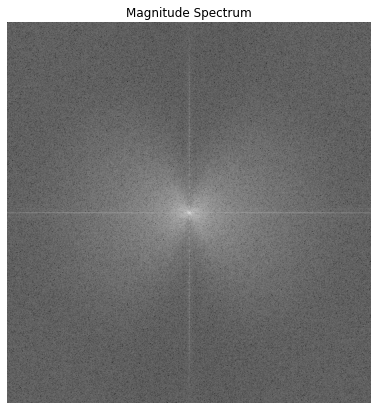

In [12]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.figure(figsize=(7,7))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

The <b>magnitude spectrum</b> is a visual representation of the frequency components of an image. It allows us to see the various patterns and details within an image and separates them into three main frequency components mentioned earlier:

1. <b>DC component</b>: This is the zero-frequency component, which corresponds to the average brightness or luminosity of the image. It is usually located at the center of the magnitude spectrum.

2. <b>Low frequencies</b>: These components represent the smooth and gradual changes in the image, such as large uniform areas, soft gradients, or slow transitions in brightness. They are generally found closer to the center of the magnitude spectrum, surrounding the DC component. Low frequencies contain more image information than higher ones, as their magnitude is higher.

3. <b>High frequencies</b>: These components capture the abrupt changes, fine details, edges, textures, or noise within the image. They are typically found towards the outer edges of the magnitude spectrum, with smaller magnitudes compared to low frequencies.

Analyzing the magnitude spectrum helps us identify areas that may require enhancement or filtering to improve image quality. In the example, we can see two dominating patterns, vertical and horizontal lines, that are visible in the spectrum. These patterns typically stem from the regular structures present in the background of the image (such as the very evident horizontal scan marks in the image).

This visualization of the magnitude spectrum is important for understanding the distribution of frequency components that we can later use to design filters that target specific regions of the frequency domain to enhance or remove noise from our original image (such as the scan marks).

#### Step 6: Apply filters to the frequency domain representation of the image

Applying filters to the frequency domain representation allows us to remove unwanted frequency components (e.g., noise like the scan marks in the image) or emphasize specific frequencies. In this example, we apply vertical filters to remove horizontal lines from the image.

It is important to note that we should avoid filtering the DC component, as it represents the average brightness of the image, and modifying it can affect the overall luminosity. This is why we excluded 286 (or fshift.shape[0]//2 -1) in the code below.

Since we shifted the DC to the center, we can use fshift.shape[1]//2 to locate the center of the frequency domain representation (magnitude spectrum) along the horizontal axis. The fshift.shape[1] returns the number of columns in the frequency domain array, and dividing it by 2 (//2) gives us the middle column.

We apply vertical filters to target the horizontal lines in the frequency domain representation. To do this, we set the values of the magnitude spectrum in the vertical direction around the center (both above and below) to 1. This operation effectively filters out the frequency components responsible for the horizontal lines in the image. As a result, when we perform the Inverse Fourier Transform, the horizontal lines are suppressed, and the image appears cleaner.

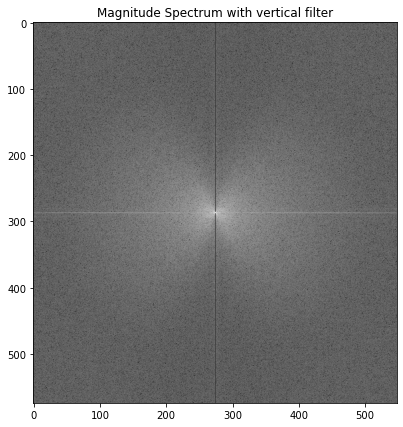

In [13]:
image_gray_fft2 = fshift.copy()
image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1

plt.figure(figsize=(7,7))
plt.title('Magnitude Spectrum with vertical filter')
plt.imshow(np.log(abs(image_gray_fft2)), cmap='gray');

In this example, I’ve created a vertical filter in the magnitude spectrum. You can also include horizontal filter, excluding the DC component, to see how it affects the output. (Spoiler alert: It did not help that much. In some cases, you may want to preserve some patterns in the magnitude spectrum (such as the horizontal filter) to maintain the overall image structure, as removing them could lead to unwanted artifacts or loss of important details or may not be necessary at all.

For example, when processing an image with a striped pattern, removing horizontal lines might compromise the pattern’s visual integrity and add unwanted vertical line artifacts. It is crucial to analyze the image and its frequency components to make an informed decision on whether to filter these lines or not, based on the specific requirements of your image processing task and the desired outcome.

#### Step 7: Use the inverse Fourier Transform to obtain the filtered grayscale image and visualize it

After applying the desired filters, we can use the Inverse Fourier Transform to convert the filtered frequency domain representation back to the spatial domain:

In [14]:
# Use Inverse Fourier Transform
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

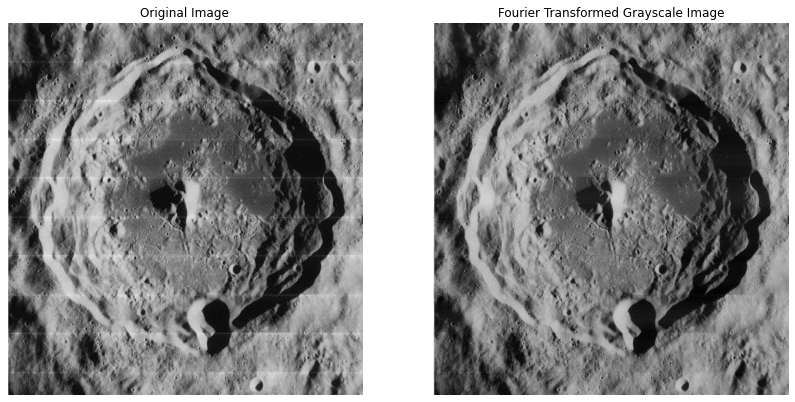

In [15]:
# Plot the original and fourier-transformed grayscale image
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_gray_image, cmap='gray')
ax[1].set_title('Fourier Transformed Grayscale Image')
ax[1].axis('off')

plt.show()


#### Step 8: Apply the Fourier Transform to each channel of the RGB image and use the same filters as Step 6

Now that we have seen how to apply the Fourier Transform to a grayscale image, let’s take a look at how we can apply it to a color image. We can use the same technique we used earlier, but this time we apply it to each channel of the RGB image.

First, we iterate over each channel of the image and apply the Fourier Transform to it using the np.fft.fft2 function. We then shift the zero-frequency components to the center using np.fft.fftshift, which is necessary for the filtering step:

In [16]:
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()
    
    # Use the same filters as the grayscale image, just change the variables
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2] = 1
    transformed_channels.append(abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))


Here, we use the same vertical filter as before, but this time we apply it to each channel separately.

#### Step 9: Combine the filtered channels and clip the values to the valid range

Now that we have filtered each channel of the RGB image, we need to combine them to create the final filtered image. We use the `np.dstack` function to stack the filtered channels along the depth axis, creating a new 3D array. We then clip the pixel values of this new image to the valid range of 0-255 using `np.clip`, and convert the pixel values to unsigned 8-bit integers using the `astype` method.

In [17]:
filtered_rgb_image = np.dstack([transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

#### Step 10: Visualize the results using the plot_fourier_transformer function

Finally, we can visualize the filtering process results using the `plot_fourier_transformer` function. This function takes three arguments: the original image, the filtered grayscale image, and the filtered RGB image.

In [18]:
def plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)

    # Convert the image to grayscale
    gray_image = rgb2gray(image[:,:,:3])
    
    # Calculate the 2D Fourier transform and shift the zero-frequency components to the center
    f_image = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f_image)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the images
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))

    ax[0, 0].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 0].set_title('Magnitude Spectrum')

    ax[0, 1].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 1].imshow(np.log(abs(image_gray_fft2)), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum with filter')

    ax[0, 2].imshow(gray_image, cmap='gray')
    ax[0, 2].set_title('Grayscale Image')
    ax[0, 2].set_axis_off()

    ax[1, 0].imshow(image)
    ax[1, 0].set_title('Original Image')
    ax[1, 0].set_axis_off()

    ax[1, 1].imshow(filtered_gray_image, cmap='gray')
    ax[1, 1].set_title('Fourier Transformed Grayscale Image')
    ax[1, 1].set_axis_off()

    ax[1, 2].imshow(filtered_rgb_image)
    ax[1, 2].set_title('Fourier Transformed RGB Image')
    ax[1, 2].set_axis_off()

    # Save the Fourier-transformed RGB image
    plt.savefig('filtered_rgb_image.png', dpi=300)
    plt.show()


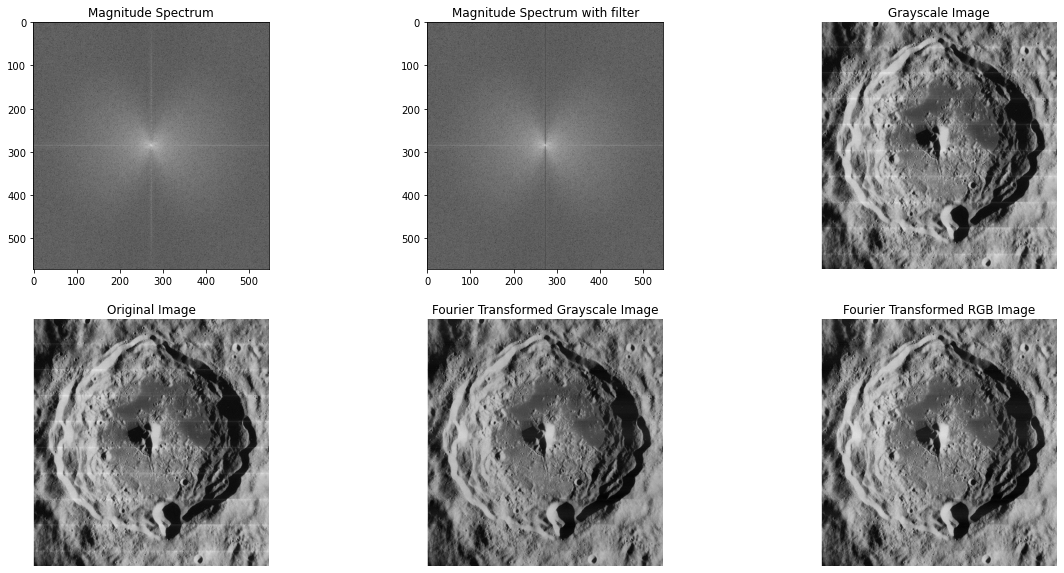

In [19]:
plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)

This function plots six images in a 2x3 grid. The top row contains the magnitude spectrum of the grayscale image, the magnitude spectrum of the grayscale image with the filter applied, and the grayscale image itself. The bottom row contains the original image, the filtered grayscale image, and the filtered RGB image.

The filtered image have vertical lines removed and have a smoother appearance, with less high-frequency noise.

To summarize, here’s the combined version of the steps:

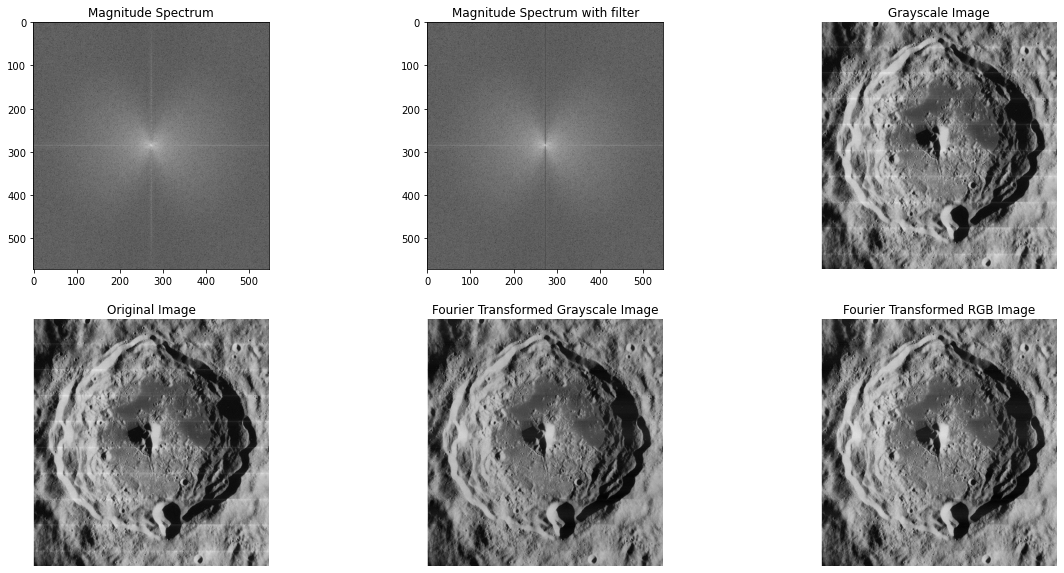

In [13]:
# Load the image
image = imread('lunar_orbiter.jpg')

# Check if the input image is grayscale (2D) and convert it to a 3-channel image (3D) if necessary
if len(image.shape) == 2:
    image = np.stack((image, image, image), axis=-1)

# Convert the image to grayscale
gray_image = rgb2gray(image)

# Calculate the 2D Fourier transform and shift the zero-frequency components to the center
f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

image_gray_fft2 = fshift.copy()

# Apply vertical filters
image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1

# Perform inverse Fourier transform
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

# Fourier transform for RGB image
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()

   # Apply vertical filters
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2] = 1

    transformed_channels.append(
        abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))

filtered_rgb_image = np.dstack(
    [transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

# Call the function
plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)

#### Let's try two more examples:

**Using the moon image:**

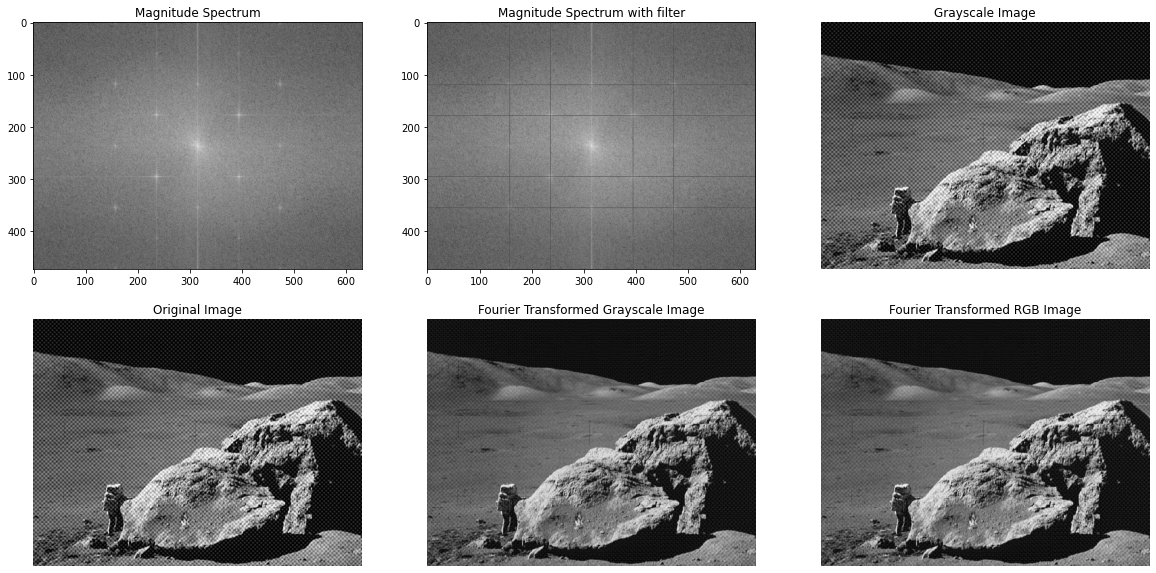

In [20]:
# Load the image
image = imread('moon_image.png')

# Check if the input image is grayscale (2D) and convert it to a 3-channel image (3D) if necessary
if len(image.shape) == 2:
    image = np.stack((image, image, image), axis=-1)

# Convert the image to grayscale
gray_image = rgb2gray(image)

# Calculate the 2D Fourier transform and shift the zero-frequency components to the center
f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

image_gray_fft2 = fshift.copy()

# Apply vertical filters - from left to right

image_gray_fft2[:, 158] = 1
image_gray_fft2[:, 158] = 1

image_gray_fft2[:, 236] = 1
image_gray_fft2[:, 236] = 1

image_gray_fft2[:, 394] = 1
image_gray_fft2[:, 394] = 1

image_gray_fft2[:, 472] = 1
image_gray_fft2[:, 472] = 1

# Apply horizontal filters - from top to bottom

image_gray_fft2[120, :] = 1
image_gray_fft2[120, :] = 1

image_gray_fft2[179, :] = 1
image_gray_fft2[179, :] = 1

image_gray_fft2[296, :] = 1
image_gray_fft2[296, :] = 1

image_gray_fft2[356, :] = 1
image_gray_fft2[356, :] = 1

# Perform inverse Fourier transform
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

# Fourier transform for RGB image
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()

   # Apply vertical filters - from left to right

    rgb_fft2[:, 158] = 1
    rgb_fft2[:, 158] = 1

    rgb_fft2[:, 236] = 1
    rgb_fft2[:, 236] = 1

    rgb_fft2[:, 394] = 1
    rgb_fft2[:, 394] = 1

    rgb_fft2[:, 472] = 1
    rgb_fft2[:, 472] = 1

    # Apply horizontal filters - from top to bottom

    rgb_fft2[120, :] = 1
    rgb_fft2[120, :] = 1

    rgb_fft2[179, :] = 1
    rgb_fft2[179, :] = 1

    rgb_fft2[296, :] = 1
    rgb_fft2[296, :] = 1

    rgb_fft2[356, :] = 1
    rgb_fft2[356, :] = 1
    
    transformed_channels.append(
        abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))

filtered_rgb_image = np.dstack(
    [transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

# Call the function
plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)

Output (source: NASA, edited by the author)

By using multiple vertical and horizontal filters, we have removed most of the noise patterns obvious in the image.

You can also try exploring adding or removing filters in the above example depending on the quality that you want.

In [17]:
# # Plot fourier transform of the lunar orbiter image
# image_path = 'moon_image.png'
# plot_fourier_transformer(image_path)

**Using the paint image:**

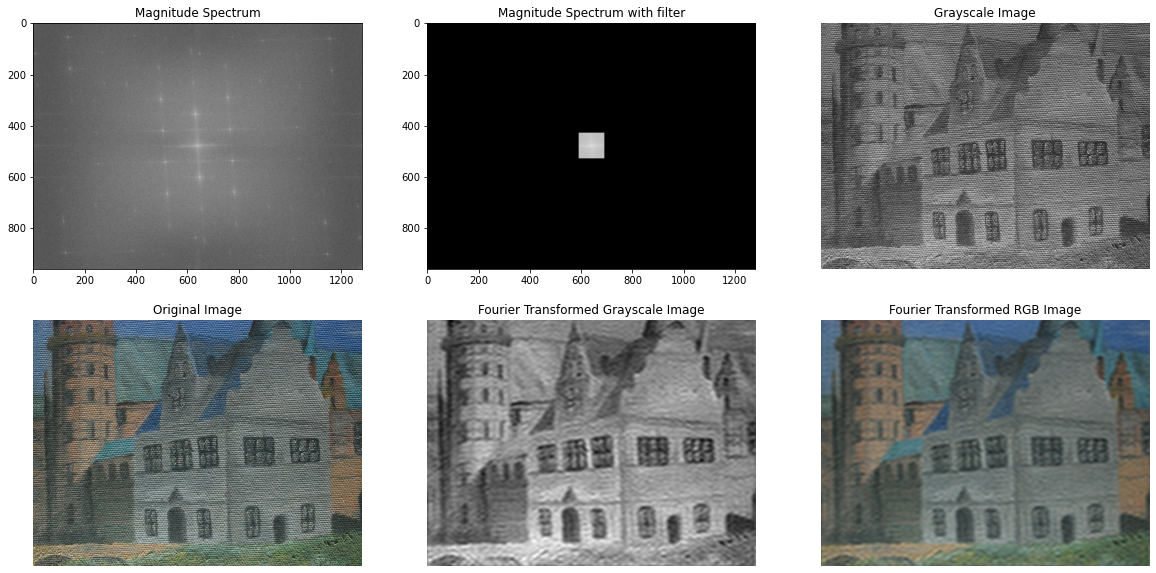

In [22]:
def plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)

    # Convert the image to grayscale
    gray_image = rgb2gray(image[:,:,:3])
    
    # Calculate the 2D Fourier transform and shift the zero-frequency components to the center
    f_image = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f_image)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the images
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))

    ax[0, 0].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 0].set_title('Magnitude Spectrum')

    ax[0, 1].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 1].imshow(np.log(abs(fshift_masked) + 1e-8), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum with filter')

    ax[0, 2].imshow(gray_image, cmap='gray')
    ax[0, 2].set_title('Grayscale Image')
    ax[0, 2].set_axis_off()

    ax[1, 0].imshow(image)
    ax[1, 0].set_title('Original Image')
    ax[1, 0].set_axis_off()

    ax[1, 1].imshow(filtered_gray_image, cmap='gray')
    ax[1, 1].set_title('Fourier Transformed Grayscale Image')
    ax[1, 1].set_axis_off()

    ax[1, 2].imshow(filtered_rgb_image)
    ax[1, 2].set_title('Fourier Transformed RGB Image')
    ax[1, 2].set_axis_off()

    # Save the Fourier-transformed RGB image
    plt.savefig('filtered_rgb_image.png')
    plt.show()


# Load the image
image = imread('paint.JPG')

# Check if the input image is grayscale (2D) and convert it to a 3-channel image (3D) if necessary
if len(image.shape) == 2:
    image = np.stack((image, image, image), axis=-1)

# Convert the image to grayscale
gray_image = rgb2gray(image)

# Calculate the 2D Fourier transform and shift the zero-frequency components to the center
f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

image_gray_fft2 = fshift.copy()

# Create a square mask to retain only the DC component
mask = np.zeros(fshift.shape)
mask_center = (fshift.shape[0]//2, fshift.shape[1]//2)
mask_width = 50
mask[mask_center[0]-mask_width:mask_center[0]+mask_width,
     mask_center[1]-mask_width:mask_center[1]+mask_width] = 1

# Apply the mask to the Fourier transformed image
fshift_masked = fshift * mask

# Perform inverse Fourier transform
inv_fshift = np.fft.ifftshift(fshift_masked)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

# Fourier transform for RGB image
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft_masked = rgb_fft * mask
    transformed_channels.append(abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft_masked))))

filtered_rgb_image = np.dstack(
    [transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

# Call the function
plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)

Output #8 (Image by Borja, B., edited with permission from the author)

In correcting the paint image with textured horizontal line artifacts, I created a square mask to retain only the DC component and small areas near it so that only the most important frequencies or parts of the image are retained. See Python code below. I experimented with the mask width to identify the optimal size that effectively reduces blur and eliminates the lines. As I decrease the size of the width (lower than 50), the transformed image becomes more blurred. On the other hand, increasing the size of the width (higher than 50) returns some of the horizontal line artifacts/noise.

```Python
# Create a square mask to retain only the DC component
mask = np.zeros(fshift.shape)
mask_center = (fshift.shape[0]//2, fshift.shape[1]//2)
mask_width = 50
mask[mask_center[0]-mask_width:mask_center[0]+mask_width,
     mask_center[1]-mask_width:mask_center[1]+mask_width] = 1

# Apply the mask to the Fourier transformed image
fshift_masked = fshift * mask
```

We can use contrast stretching and other histogram manipulation techniques in the next part of this episode to improve the RGB color values of the image as well as apply more advanced techniques in sharpening the image in the future episodes.

---
<h2 style="color:#ff0090">Conclusion</h2>

Fourier Transform is a powerful tool for image processing that allows us to analyze the frequency content of an image and apply filters to remove unwanted noise patterns. By using this technique, we were able to remove horizontal and vertical lines from an image and create a smoother, cleaner output. However, it’s important to note that the introduction of filters can also introduce new artifacts or noise in the image, which should be considered when deciding on the appropriate filter.

In the next segment of this blog, we’ll delve into the topic of <b>White Balancing</b>, discussing its application in enhancing the color balance and accuracy of images. Stay tuned!

---
<h2 style="color:#ff0090">References</h2>

- Borja, B. (2023). Lecture 2: Introduction to Image Enhancements [Jupyter Notebook and Images]. Introduction to Image Processing 2023, Asian Institute of Management
- Borja, B. (2023). Image Enhancement Assignment [Jupyter Notebook and Images]. Introduction to Image Processing 2023, Asian Institute of Management